# Imports and data

Practice for this course: 
https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-seaborn


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns # for data (diamonds)
import pandas as pd
import numpy as np

In [3]:
data = sns.load_dataset('diamonds', cache=True, data_home=None)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Scatterplot

In [4]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


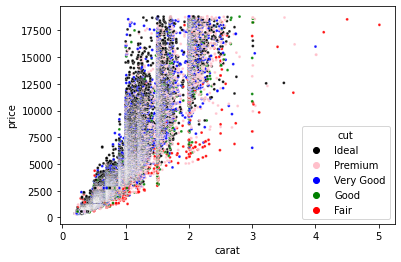

In [5]:
hue_colors = {'Ideal': 'black', 
             'Premium': 'pink', 
             'Very Good': 'b', # blue
             'Good': 'green', 
             'Fair': '#ff0000'} # red

sns.scatterplot(data = data, 
                x = 'carat', 
                y = 'price', 
                hue = 'cut',
                palette = hue_colors,
                alpha = 0.9, 
                s = 8)
plt.show()

# Relational plots

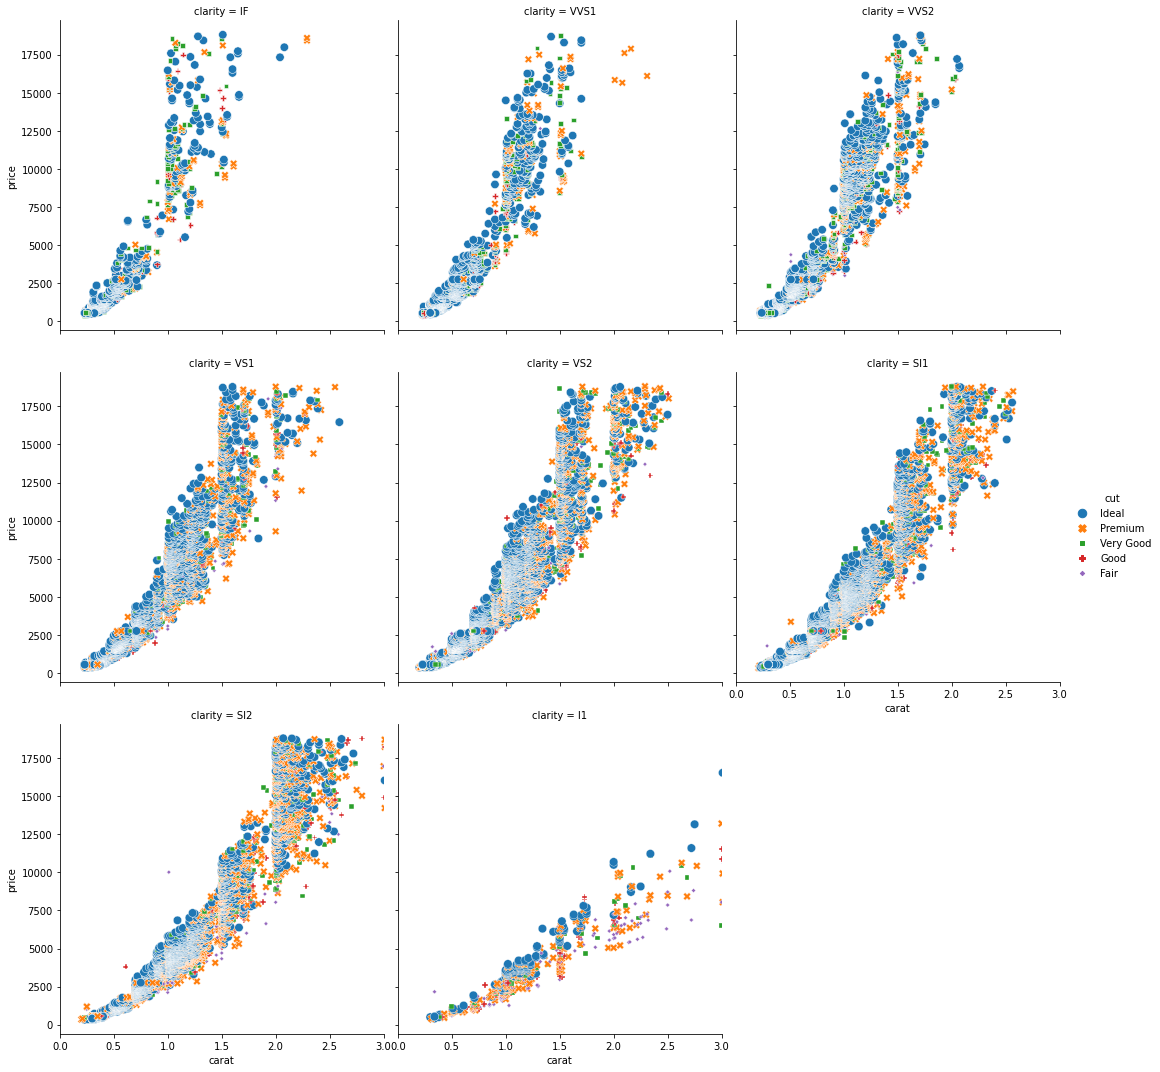

In [6]:
g = sns.relplot(data = data, 
           x = 'carat', 
           y = 'price', 
           kind = 'scatter', 
           col = 'clarity',
            # col_order = ['IF', VS1', 'VVS1', 'VVS2'],
            col_wrap = 3,
           hue = 'cut', 
           size = 'cut', 
            style = 'cut')
g.set(xlim = (0, 3))
plt.show()

In [7]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Categorical plots

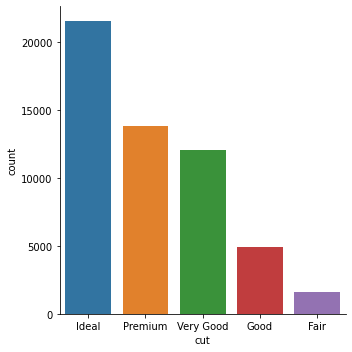

In [8]:
# countplot

sns.catplot(data = data, x = 'cut', kind = 'count')
plt.show()

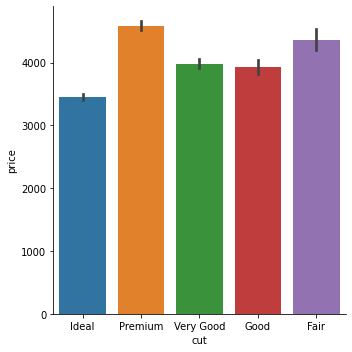

In [9]:
# Barplot

sns.catplot(x = 'cut', y = 'price', data = data, 
           kind = 'bar')
            # ci = None)
plt.show()

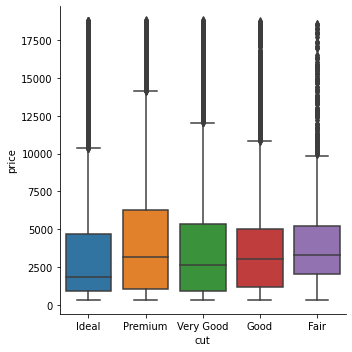

In [10]:
# Boxplot for median, spread, skewness and outliers
sns.catplot(x = 'cut', y = 'price', data = data, 
           kind = 'box')
            # sym = '') # to omit outliers
            # whis = 2.0  # to change from default of 1.5 * IQR
            # whis = [5, 95] # percentiles
            # whis = [0, 100] # min, max

plt.show()

# Point plots

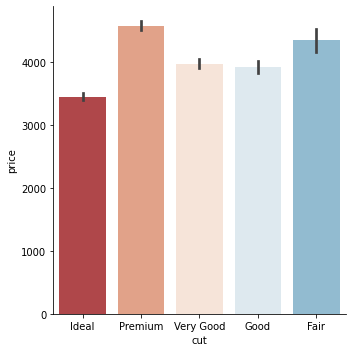

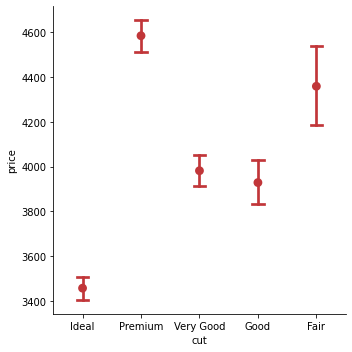

In [33]:
sns.set_palette('RdBu')

sns.catplot(data = data,
            x = 'cut', 
            y = 'price', 
            kind = 'bar')

sns.catplot(data = data, 
            x = 'cut', 
            y = 'price', 
            kind = 'point',
            join = False, 
            capsize = 0.2)

plt.show()

The plots above would look much nicer next to each other... But it  doesn't work with catplot().  

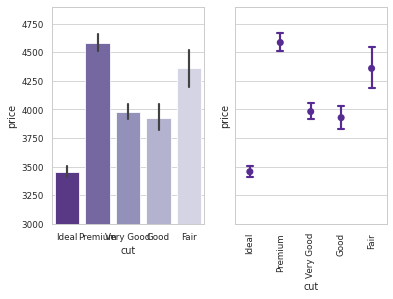

In [65]:
# sns.set_context('notebook')

sns.set_palette('Purples_r')

sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 2, 
                      sharey = True)

g = sns.barplot(data = data, 
            x = 'cut', 
            y = 'price', 
            ax = ax[0])

h = sns.pointplot(data = data, 
            x = 'cut', 
            y = 'price', 
            join = False, 
            capsize = 0.2, 
            ax = ax[1])

g.set(ylim = (3000, None))
plt.xticks(rotation = 90)


plt.show()

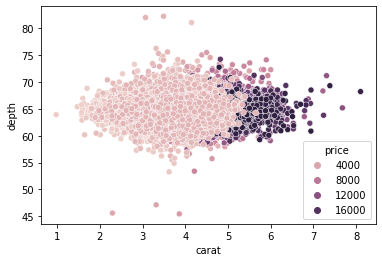

In [19]:
# to jitter values: 
def jitter(values, j):
    return values + np.random.normal(j, 0.5, values.shape)

# scatter plot
sns.scatterplot(x = jitter(data['carat'], 3), y = jitter(data['depth'], 3), hue = data['price'])
plt.show()